# Meetup Hands-on Notebook

Prerequisites: 
We will be using Python(2.7) in this tutorial. You will need the following packages:
    
    - Numpy
    - Scikit-learn
    - Pandas
    - Matlpotlib
    - Jupyter-Notebook
    
Installation:
    For Mac OS : 
        
        Option 1) Install Anaconda which comes with all required packages.
        Option 2) Open a terminal, then first run  pip install -U pip, then
    
        
        - Install Numpy      : pip install numpy
        - Install Pandas     : pip install pandas
        - Install Sklearn    : pip install scipy ; pip install -U sklearn
        - Install Matplotlib : pip install matplotlib
        - Jupyter Notebook   : pip install jupyter
    
    
     For Windows:
        The easiest way is to install Anaconda which will come with all the required packages. Install Anaconda from    https://docs.continuum.io/anaconda/install.
    
Note- We will be using Python 2.7 here although most of the code will work with Python 3 as well, however you will have to put parantheses around all print statements e.g- "print x" becomes "print(x)". In addition, division will no longer be needed to be cast to float explicitly
        
    
    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## Loading  data and taking a quick look at it

In [3]:
train_data= pd.read_csv("train.csv")
test_data=  pd.read_csv("test.csv")

In [3]:
train_data.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL


In [4]:
test_data.head()

,QuoteNumber,Original_Quote_Date,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,3,2014-08-12,E,16,0.9364,0.0006,"1,487",1.3045,N,4,...,1,1,-1,1,-1,20,-1,25,Y,IL
1,5,2013-09-07,F,11,0.9919,0.0038,564,1.1886,N,8,...,10,10,-1,5,-1,5,-1,21,N,NJ
2,7,2013-03-29,F,15,0.8945,0.0038,564,1.0670,N,11,...,10,11,-1,20,-1,22,-1,11,N,NJ
3,9,2015-03-21,K,21,0.8870,0.0004,"1,113",1.2665,Y,14,...,8,8,-1,13,-1,8,-1,21,N,TX
4,10,2014-12-10,B,25,0.9153,0.0007,935,1.0200,N,4,...,7,7,-1,3,-1,22,-1,21,N,CA


In [5]:
print "Training Data Shape:",train_data.shape
print "Test Data Shape:",test_data.shape


Training Data Shape: (260753, 299)
Test Data Shape: (173836, 298)


In [6]:
# How to look at columns in the data
print train_data.columns

Index([u'QuoteNumber', u'Original_Quote_Date', u'QuoteConversion_Flag',
       u'Field6', u'Field7', u'Field8', u'Field9', u'Field10', u'Field11',
       u'Field12',
       ...
       u'GeographicField59A', u'GeographicField59B', u'GeographicField60A',
       u'GeographicField60B', u'GeographicField61A', u'GeographicField61B',
       u'GeographicField62A', u'GeographicField62B', u'GeographicField63',
       u'GeographicField64'],
      dtype='object', length=299)


## Dropping Quote Number Column and Saving label column

Why do you think the Quote Number column is useless?

In [4]:
train_data.drop("QuoteNumber",axis=1, inplace=True)
test_data.drop("QuoteNumber",axis=1, inplace=True)
# .values converts to Numpy array
Y= train_data["QuoteConversion_Flag"].values
train_data.drop("QuoteConversion_Flag",axis=1, inplace=True)

Lets look at the new dimensions (shapes)

In [8]:
print "Training data Shape:", train_data.shape
print "Testing data Shape:", test_data.shape
print "Labels Shape:", Y.shape

Training data Shape: (260753, 297)
Testing data Shape: (173836, 297)
Labels Shape: (260753,)


In [9]:
print "Number of Positive Quotes {}, Fraction={}".format(str(len(Y[Y==1])), str(len(Y[Y==1])/float(len(Y))))
print "Number of Negative Quotes {}, Fraction={}".format(str(len(Y[Y==0])), str(len(Y[Y==0])/float(len(Y))))


Number of Positive Quotes 48894, Fraction=0.18751078607
Number of Negative Quotes 211859, Fraction=0.81248921393


We have a somewhat unbalanced class ratio. What challenges do you think class imbalance brings? How do you judge what a good classifier is?

# Dealing with Date Columns

We convert the Date column to a pandas datetime object which allows us to extract numbers from it.

In [5]:
train_data['Date'] = pd.to_datetime(pd.Series(train_data['Original_Quote_Date']))
train_data = train_data.drop('Original_Quote_Date',axis=1)
test_data['Date'] = pd.to_datetime(pd.Series(test_data['Original_Quote_Date']))
test_data = test_data.drop('Original_Quote_Date',axis=1)



In [11]:
print train_data["Date"].dtype
train_data.head()


datetime64[ns]


,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,...,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64,Date
0,B,23,0.9403,0.0006,965,1.0200,N,17,23,17,...,9,-1,8,-1,18,-1,10,N,CA,2013-08-16
1,F,7,1.0006,0.0040,548,1.2433,N,6,8,6,...,10,-1,11,-1,17,-1,20,N,NJ,2014-04-22
2,F,7,1.0006,0.0040,548,1.2433,N,7,12,7,...,18,-1,21,-1,11,-1,8,N,NJ,2014-08-25
3,J,10,0.9769,0.0004,"1,165",1.2665,N,3,2,3,...,5,-1,10,-1,9,-1,21,N,TX,2013-04-15
4,E,23,0.9472,0.0006,"1,487",1.3045,N,8,13,8,...,22,-1,10,-1,11,-1,12,N,IL,2014-01-25


In [6]:
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['weekday'] = train_data['Date'].dt.dayofweek

test_data['Year'] = test_data['Date'].dt.year
test_data['Month'] = test_data['Date'].dt.month
test_data['weekday'] = test_data['Date'].dt.dayofweek

train_data.drop('Date', axis=1,inplace=True)
test_data.drop('Date', axis=1,inplace=True)


## Checking For columns with Null Values (Missing data)

Some of the columns contain missing values. Most machine learning algorithms in Scikit Learn (and almost all other libraries) cannot handle them. Let us find which columns are troublesome.

In [13]:
print "List of Columns with Null values, Number of Nulls and fraction of entries that are null"
count_null=0
null_cols=[]
for f in train_data.columns:
        null_sum=train_data[f].isnull().sum()
        if null_sum>0:
            null_cols.append(f)
            print f,null_sum,null_sum*100/float(len(train_data))
            count_null+=1


#print null_cols

List of Columns with Null values, Number of Nulls and fraction of entries that are null
PersonalField7 113 0.0433360306497
PersonalField84 124208 47.6343512826
PropertyField3 81 0.0310638803772
PropertyField4 63 0.0241607958489
PropertyField29 200685 76.9636399198
PropertyField32 70 0.0268453287211
PropertyField34 70 0.0268453287211
PropertyField36 113 0.0433360306497
PropertyField38 1220 0.467875729138


PersonalField84,PropertyField29 and PropertyField38 are the worst. Let us look at what the values in these columns are

In [35]:
field_mask="PersonalField84" # Change as Necessary
print "Overall Value counts"
print train_data[field_mask].value_counts(dropna=False)
print "Positive Class counts"
print train_data[field_mask][Y==1].value_counts(dropna=False)
print "Negative Class counts"
print train_data[field_mask][Y==0].value_counts(dropna=False)



Overall Value counts
 2.0    134906
NaN     124208
 1.0      1564
 5.0        62
 3.0         7
 7.0         3
 4.0         2
 8.0         1
Name: PersonalField84, dtype: int64
Positive Class counts
NaN     24082
 2.0    23949
 1.0      827
 5.0       28
 3.0        4
 7.0        2
 4.0        2
Name: PersonalField84, dtype: int64
Negative Class counts
 2.0    110957
NaN     100126
 1.0       737
 5.0        34
 3.0         3
 7.0         1
 8.0         1
Name: PersonalField84, dtype: int64


As most machine learning algorithms cannot deal with missing values, we will have to fill up these values. Here we shall do the simplest possible thing and fill all of them with the value -1. In the real world we might have to spend significant time deciding how to deal with these values or if indeed to drop these columns altogether

In [7]:
train_data.fillna(-1,inplace=True)

Scikit Learn also provides us tools to perform this sort of filling of missing values via the Imputer module

In [16]:
## If we had used imputer instead (DONT RUN)
#from sklearn.preprocessing import Imputer
#for f in null_cols:
    #imputer=Imputer(strategy="most_frequent")
    #imputer.fit(train[f])
    #train_data[f]=imputer.transform(train_data[f])
    #test_data[f]=imputer.transform(test_data[f])


## Lets Do some label Encoding for categorical variables

We will have quite a few columns which have string data which are categorical. For example "GeographicField64" has the name of the state. As machine learning algorithms work with numbers, we will need to convert them to numbers. We do this using Label Encoder.

In [8]:
from sklearn.preprocessing import LabelEncoder
string_cols=[]
for f in train_data.columns:
    if train_data[f].dtype=='object':
        ## Here we store all the names of the columns containing strings
        ##and the Number of unique values in each field (Why?)
        string_cols.append([f,len(train_data[f].unique())])
        lbl = LabelEncoder()
        lbl.fit(list(train_data[f].values) + list(test_data[f].values))
        train_data[f] = lbl.transform(list(train_data[f]))
        test_data[f] = lbl.transform(list(test_data[f]))
        

Let us look at the columns we just label-encoded. Why is this a useful check?

In [16]:
print string_cols

[['Field6', 8], ['Field10', 8], ['Field12', 2], ['CoverageField8', 7], ['CoverageField9', 12], ['SalesField7', 7], ['PersonalField7', 3], ['PersonalField16', 50], ['PersonalField17', 66], ['PersonalField18', 61], ['PersonalField19', 57], ['PropertyField3', 3], ['PropertyField4', 3], ['PropertyField5', 2], ['PropertyField7', 19], ['PropertyField14', 4], ['PropertyField28', 4], ['PropertyField30', 2], ['PropertyField31', 4], ['PropertyField32', 3], ['PropertyField33', 4], ['PropertyField34', 3], ['PropertyField36', 3], ['PropertyField37', 2], ['PropertyField38', 3], ['GeographicField63', 3], ['GeographicField64', 4]]


In [17]:
print train_data["GeographicField64"].value_counts()

0    94725
2    69293
3    65011
1    31724
Name: GeographicField64, dtype: int64


In [40]:
pd.read_csv("train.csv")["GeographicField64"].value_counts()

CA    94725
NJ    69293
TX    65011
IL    31724
Name: GeographicField64, dtype: int64

What do you think the possible issues with this sort of encoding are? The particularly observant among you might have noticed I did something slightly non-kosher above. What would the kosher version be?

# Train Test (Validation) Split with Stratification

In order to check how well our classifier is doing we need to divide the data into training and validation sets. Scikit-learn provides useful tool for this

In [9]:
from sklearn.model_selection import train_test_split
Train_X, Val_X, Train_Y, Val_Y= train_test_split(train_data, Y, test_size=0.25, random_state=42,stratify=Y)

In [10]:
#Checking out that the splits worked out well.

print "Lengths of Training and Testing features:",len(Train_X),len(Val_X)
print "Lengths of Training and Validation labels:",len(Train_Y),len(Val_Y)
print "How the labels were split in the Validation set:",np.bincount(Val_Y)/(float(len(Val_Y)))
print "Original Label Ratios:",np.bincount(Y)/(float(len(Y)))

Lengths of Training and Testing features: 195564 65189
Lengths of Training and Validation labels: 195564 65189
How the labels were split in the Validation set: [ 0.8124837  0.1875163]
Original Label Ratios: [ 0.81248921  0.18751079]


## Scaling Variables



In order for our optimization algorithms to work properly, we should ensure that all the variables have similar spreads. A common way to achieve this is to use "Standard Scaling", which rescales each field so that so that it has a mean of zero and a Standard deviation of one.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler= StandardScaler()
Train_X_scaled=scaler.fit_transform(Train_X)
Val_X_scaled=scaler.transform(Val_X)

## Note that this step also converts the data to a numpy array

In [13]:
np.std(Train_X_scaled[:,5]), np.mean(Train_X_scaled[:,5])

(1.0, 4.8962354559648555e-16)

## Lets Try out Logistic Regression with Cross Validation 

Now we will not really be using the test data, because we shall not be submitting anything. As the data is somewhat large, some of you might run into issues of running out of memory. So we shall save and then delete the test data set for the rest of the tutorial. 

In [16]:
test_data.to_csv("test_transformed.csv",index=False)
del test_data

We shall use first Logistic Regression to do our classification. For any machine learning algorithms there are numerous hyperparameters which we have tune to achieve best results. For Logistic Regression we use the provided LogisticRegressionCV module. We use three fold cross validation to find the best regularization parameter ("C"). 

In [17]:
from sklearn.linear_model import LogisticRegressionCV
LR= LogisticRegressionCV(Cs=10,n_jobs=-1,scoring='roc_auc',cv=3)
LR.fit(Train_X_scaled,Train_Y)


LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
           refit=True, scoring='roc_auc', solver='lbfgs', tol=0.0001,
           verbose=0)

 Let's see which paramater the code picked out?

In [18]:
LR.C_

array([ 0.00599484])

Let's see how our classifier did

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def get_basic_metrics(actual_labels,predicted_labels):
    print " Raw Accuracy score:", accuracy_score(actual_labels, predicted_labels)
    print "==========================="
    print "CLASSIFICATION REPORT"
    print classification_report(actual_labels, predicted_labels)
    print "==========================="
    print "CONFUSION MATRIX"
    conf= confusion_matrix(actual_labels, predicted_labels)
    print "   0     1"
    print "0",conf[0,0], conf[0,1]
    print "1",conf[1,0], conf[1,1]    

In [20]:
Val_pred_LR=LR.predict(Val_X_scaled)
Train_pred_LR=LR.predict(Train_X_scaled)
get_basic_metrics(Val_Y,Val_pred_LR)


 Raw Accuracy score: 0.917348018838
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.93      0.98      0.95     52965
          1       0.87      0.66      0.75     12224

avg / total       0.91      0.92      0.91     65189

CONFUSION MATRIX
   0     1
0 51752 1213
1 4175 8049


Let us now define a couple of functions to get back the ROC Curve and the AUC score for any classifier

In [21]:
from sklearn.metrics import roc_curve,roc_auc_score
def get_roc_curve(Model, features, labels):
    probas=Model.predict_proba(features)[:,1]
    fpr,tpr,thresholds=roc_curve(labels,probas)
    return (fpr,tpr,thresholds)

def get_auc_score(Model, features, labels):
    probas=Model.predict_proba(features)[:,1]
    return roc_auc_score(labels,probas)


In [22]:
print get_auc_score(LR,Val_X_scaled,Val_Y)

0.950243273489


We see that even with this rather naive approach and simple classifier we get a very high AUC. IN a general classification problem, one would be very happy with an AUC of 0.95

# Let's See the ROC Curve

Defining a function which will allow us to plot multiple ROC curves together

In [23]:
def plot_roc_curve(Models,features,labels, Modelnames):
    colors=['c','b','r','g','y']
    x_flat=np.linspace(0,1,500)
    plt.figure(figsize=(8,8))
    for i,Model in enumerate(Models):
        plot_vals=get_roc_curve(Model,features[i],labels[i])
        plt.plot(plot_vals[0], plot_vals[1],c=colors[i],label=Modelnames[i]+" (AUC score:"+str(get_auc_score(Model,features[i],labels[i]))[0:6]+ " )")
    plt.plot(x_flat,x_flat,'k--',label="Baseline")
    plt.xlabel("False Positice Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()


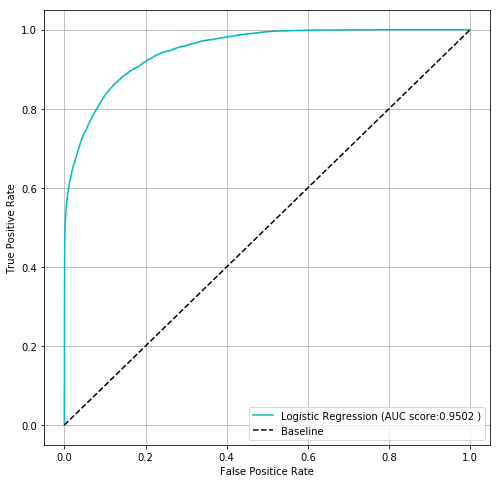

In [24]:
plot_roc_curve([LR],[Val_X_scaled],[Val_Y],["Logistic Regression"])

### Lets figure out at which features were important

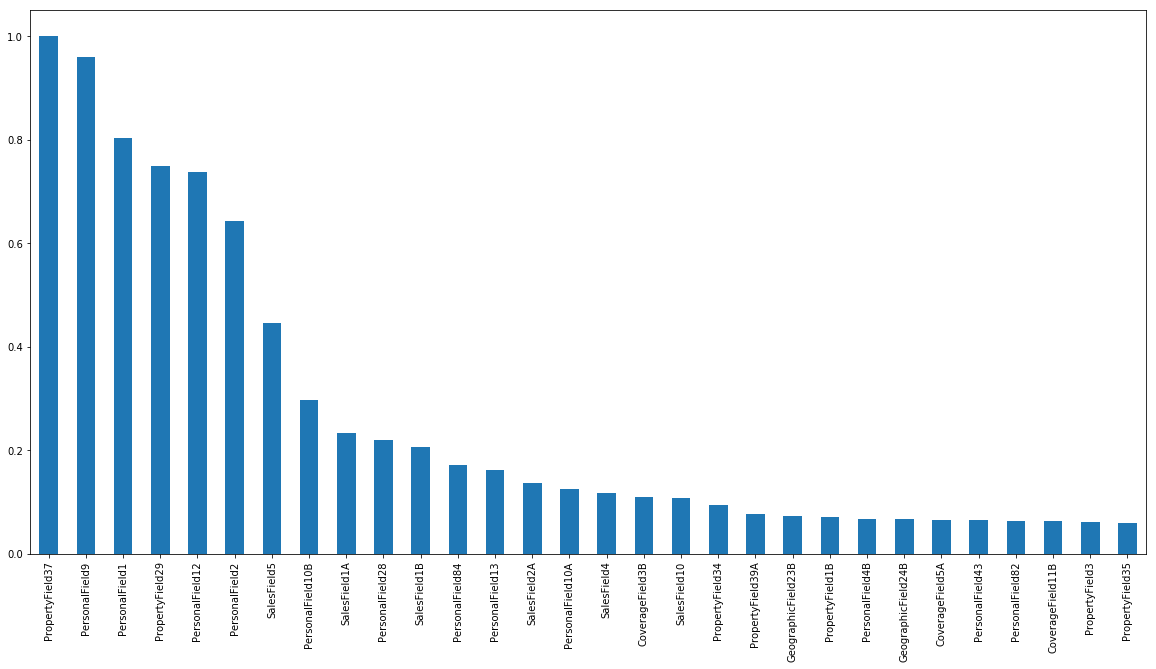

In [25]:
LR_importances= pd.Series(data=np.abs(LR.coef_[0])/max(np.abs(LR.coef_[0])),index=Train_X.columns)
LR_importances.sort_values(inplace=True,ascending=False)
LR_importances.ix[0:30].plot(kind='bar',figsize=(20,10))

In [26]:
print "Value distribution in complete dataset"
print Train_X["PropertyField37"].value_counts()
print "Value distribution for positive class in complete dataset"
print Train_X["PropertyField37"][Train_Y==1].value_counts()
print "Value distribution for negative class in complete dataset"
print Train_X["PropertyField37"][Train_Y==0].value_counts()

Value distribution in complete dataset
1    139416
2     56148
Name: PropertyField37, dtype: int64
Value distribution for positive class in complete dataset
1    21721
2    14949
Name: PropertyField37, dtype: int64
Value distribution for negative class in complete dataset
1    117695
2     41199
Name: PropertyField37, dtype: int64


As you might have noticed, training the classifier took up quite a bit of time. In general you want to avoid retraining a model unless necessary. SO we should save a trained classifier. The standard way is to save the entire classifier object as a serialized "pickle". Here we use scikit-learn's native pickler called joblib which (they claim) is a little more efficient than the standard pickle module

In [27]:
from sklearn.externals import joblib
joblib.dump(LR, 'LR_saved.pkl')
#LR_reloaded = joblib.load('filename.pkl') 

['LR_saved.pkl']

## An Alternative algorithm: RandomForests

Let us now also look at an alternative algorithm for classification, which uses a collection of decision trees to classify our data. This algorithm (Random Forests) is extremely popular for its speed and robustness as well as its tendency to avoid overfitting.

Let us also look at another common feature of machine learning codes- The use of pipelines. In this pipeline we put the Standard scaler and the Classifier one after the other and then use GridsearchCV to tune hyperparameters. In the real world, one would do a search across many different values of the different hyperparameters of the different parts of the pipeline to get the best possible classifier.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
Pipe=Pipeline([("Scaler",StandardScaler()),("Rf",RandomForestClassifier(random_state=84))])
Param_grid_Rf={'Rf__n_estimators':[50],'Rf__min_samples_split':[50,60]}
best_Rf=GridSearchCV(Pipe,Param_grid_Rf,cv=3,verbose=1,n_jobs=-1,scoring='roc_auc')
best_Rf.fit(Train_X,Train_Y)
print best_Rf.best_params_,best_Rf.best_score_,

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.8min finished


{'Rf__min_samples_split': 50, 'Rf__n_estimators': 50} 0.955999047873


Note- In the above cell, we have used standard scaler to scale our data. However in random forests, scaling is not really necessary because it is a tree based algorithm. The scaling part was put in above just to illustrate how to use pipelines to put together different modules in the classifier.

Let us put use our best selected model to predict labels on our validation set.

In [29]:
Val_Rf_pred= best_Rf.predict(Val_X)

How did we do? Lets take a look at various metrics

In [30]:
get_basic_metrics(Val_Y,Val_Rf_pred)

 Raw Accuracy score: 0.915691297612
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.92      0.98      0.95     52965
          1       0.88      0.64      0.74     12224

avg / total       0.91      0.92      0.91     65189

CONFUSION MATRIX
   0     1
0 51879 1086
1 4410 7814


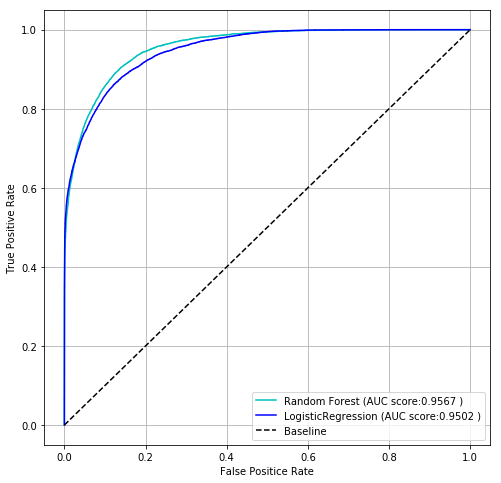

In [31]:
plot_roc_curve([best_Rf,LR],[Val_X,Val_X_scaled],[Val_Y]*2,["Random Forest","LogisticRegression"])

As we see, we get a small improvement over Logistic Regression. However one should note that in both cases, we have not really done exhaustive tuning of hyperparamters, so these results might change a little with much more tuning

Now let us see which features Random Forests picked out as important

In [35]:
importances_Rf=best_Rf.best_estimator_.named_steps["Rf"].feature_importances_

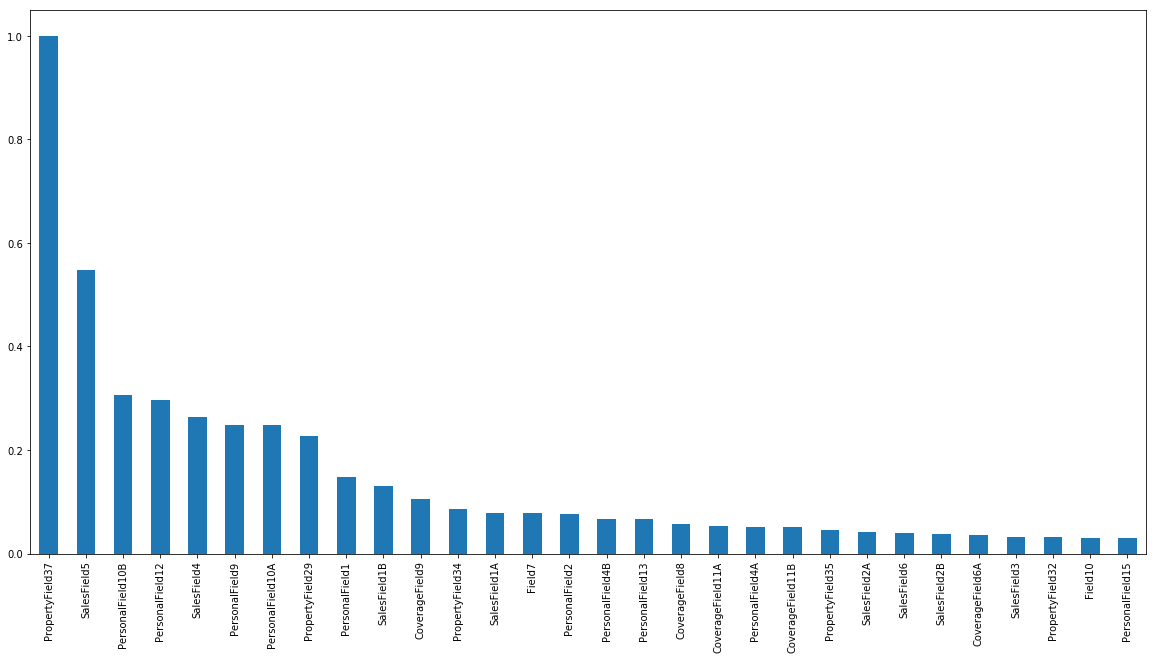

In [36]:
Rf_importances= pd.Series(data=(importances_Rf)/max(importances_Rf),index=Train_X.columns)
Rf_importances.sort_values(inplace=True,ascending=False)
Rf_importances.ix[0:30].plot(kind='bar',figsize=(20,10))

Lets also compare the feature importances as decided by the two classifiers. We shall see that there are some differences because fundamentally different mechanisms are used by the two methods

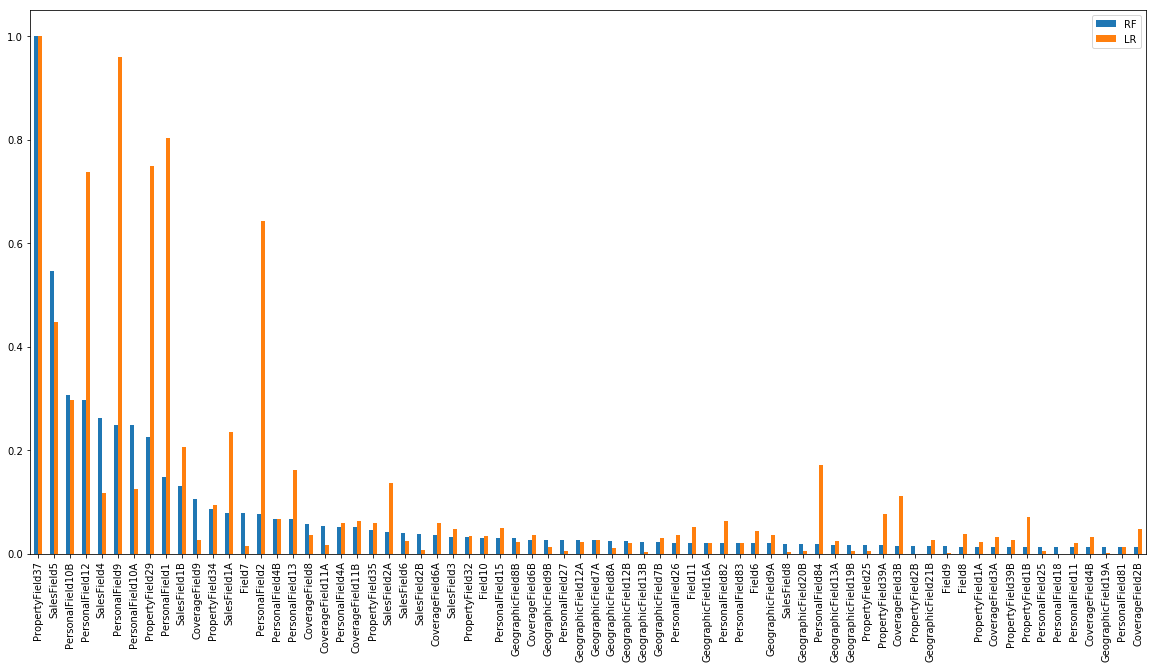

In [37]:
Imp_joined=pd.concat([Rf_importances,LR_importances],axis=1,keys=["RF","LR"])
Imp_joined.sort_values(by="RF",inplace=True,ascending=False)
Imp_joined.ix[0:70].plot(kind='bar',figsize=(20,10))

Saving the Random forest classifier 

In [41]:
joblib.dump(best_Rf, 'RF_saved.pkl')
#RF_reloaded = joblib.load('RF_saved.pkl') 

['RF_saved.pkl']

### If we had to submit on Kaggle

In case we had to submit on kaggle, we would have to submit a csv file containing the Quote Number and predicted probability. We could get the Quote Number from the test.csv file, and using the same methods to clean the data, use any of our classifiers to calculate probability of quote conversion (classifier.predict_proba(Test_X)). Then submit the probability and the quote number together to kaggle.

## Conclusion

So we see that we have achieved pretty good results even by employing some relatively simple analysis. In the actual competition, the winning team had an AUC score of ~0.97. To ahieve these results they had to use a much much more complicated model and much more advanced methods. In the real world (Not the world of Kaggle competitions), it is unlikely that we will spend that much effort in gaining ~0.01 in AUC score. 

Moral 1)- Always try simple things first. Quite often the simplest methods are good enough. Always use the least complicated method that gives you as good a result as required.

Moral 2)- Most often it is the data that decides how good your performance will be. Different algorithms will in general not give you massive gains. If possible always get more data rather than spend your time building very complicated models.

## P.S- What about using SparkML?

Spark comes with a suite of machine learning tools called SparkML. The suite is designed to be very similar to Scikit-Learn and has most of the functionality of Scikit-Learn. So if we had used PySpark instead , you could use the SparkML library and use those modules.

For Example:
<b>
<code>
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
</code>
</b>